## Before you start: Data download
1. Please go to https://www.kaggle.com/tencars/392-crypto-currency-pairs-at-minute-resolution.
2. Download into the current directory (the same directory as this .ipynb notebook file) the data files for ethbtc, btcusd and ethusd.<br/>Save these zipped files with the following names: ethbtc.csv.zip, btcusd.csv.zip and ethusd.csv.zip. 

## Arbitrage
<b>Simple practical case</b><br/>
Making profit by buying and selling the same thing.

<b>Generalized theoretical definition</b><br/>
Making profit by changing your portfolio one full circle along a closed directed path of portfolio change steps.

### Questions on Arbitrage
(A) With minute-resolution [exchange rate data](https://www.kaggle.com/tencars/392-crypto-currency-pairs-at-minute-resolution) plot the time series 
$\,A\,(\,t\,)=\displaystyle{\frac{\mathrm{ETH}\,/\,\mathrm{BTC} \cdot \mathrm{BTC}\,/\,\mathrm{USD}}{\mathrm{ETH}\,/\,\mathrm{USD}}}\,$. <br/>
(B) Plot also the total volume, $\,V(\,t\,)\,$, of the three pairs, and compare it to $\,A\,(\,t\,)\,$.

#### Answer

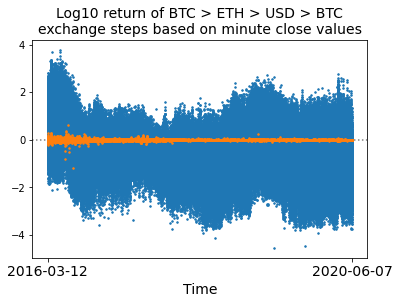

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- data: reading and transformations ---
# FX (exchange rates): read three dataframes
fx = {pair: pd.read_csv(pair + '.csv.zip') for pair in ('ethbtc', 'btcusd', 'ethusd')}

# tag each data column name with the name of the currency pair
def mapping(columns, tag):
    return {col: col if col == 'time' else tag + '_' + col for col in columns}

[df.rename(columns = mapping(df.columns, pair), inplace=True) for pair, df in fx.items()]

# fxm (fx merged): merge dataframes based on the 'time' column
fxm = fx['ethbtc'].merge(fx['btcusd'], on='time').merge(fx['ethusd'], on='time')

# arbitrage opportunity testing
A = fxm['ethbtc_close'] * fxm['btcusd_close'] / fxm['ethusd_close']

# volume is always measured in the first currency, convert all volume to USD
V = ( fxm['ethbtc_volume'] / fxm['ethusd_close'] ) + \
    ( fxm['btcusd_volume'] / fxm['btcusd_close'] ) + \
    ( fxm['ethusd_volume'] / fxm['ethusd_close'] )

# --- plotting ---
my_fontsize = 14 # font size for the text of the current plot
plt.axhline(0, c = 'gray', ls = 'dotted') # horizontal zero axis, dotted
plt.plot(np.log10(V), '.', markersize = 3)
plt.plot(10.0*np.log10(A), '.', markersize = 3)
plt.title("Log10 return of BTC > ETH > USD > BTC\nexchange steps based on minute close values", fontsize = my_fontsize)
plt.xlabel('Time', fontsize = my_fontsize)
ax = plt.gca() # gca: get current axes
ax.set_xticks([0, len(fxm['time'])])
ax.set_xticklabels(['2016-03-12','2020-06-07'], fontsize = my_fontsize)
#ax.set_yticks([-0.1, -0.05, 0, 0.05])
#ax.set_yticklabels([str(y) for y in [-0.1, -0.05, 0, 0.05]], fontsize = my_fontsize)
plt.show()

## Efficient market hypothesis (EMH)
<b>Theoretical definition</b><br/>
All information is instantaneously available to everyone, and from this information everyone makes the same conclusions.<br/>Therefore, in the long time limit there is no active trading strategy that has positive expected profit above the risk-free rate.

<b>Practical definition</b><br/>
Arbitrage opportunities are removed quickly, because the market has many well-informed participants who act quite rationally.

<b>Short form</b><br/>
There's no free lunch.

### Testing by comparing an asset to itself

#### Correlation with previous step 
CDF of asset 1-step corr

#### Few previous steps
Candlestick pattern significance

#### Several previous steps
Trend lines 

#### Many previous steps
Long-term memory, ML

### Testing the EMH among assets

#### Correlation with previous values
CDF of n-step corr values for n = 1, 5, 20 (business days)

## Modern Portfolio Theory (MPT)
also called: Markowitz Portfolio Theory

algebraic derivation

## Capital Asset Pricing Model (CAPM)

## Suggested further items
Investopedia - Efficient Market Hypothesis - https://www.investopedia.com/terms/e/efficientmarkethypothesis.asp